In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

## 1. Dataset

In [3]:
data = pd.read_csv("processed_heart_data.csv")

In [4]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


### Medical Meaning of Each Feature

| Feature                    | Description                                                    | Medical Meaning                                                         |
| -------------------------- | -------------------------------------------------------------- | ----------------------------------------------------------------------- |
| **age**                    | Age of the patient                                             | Older age is generally associated with higher heart disease risk.       |
| **sex**                    | 1 = male, 0 = female                                           | Men typically have higher risk at earlier ages.                         |
| **cp** *(chest pain type)* | 0–3 categories                                                 | Types of chest pain — some are more strongly linked with heart disease. |
| **trestbps**               | Resting blood pressure (mm Hg)                                 | High resting BP can increase risk of heart disease.                     |
| **chol**                   | Serum cholesterol (mg/dl)                                      | High cholesterol contributes to plaque buildup in arteries.             |
| **fbs**                    | Fasting blood sugar (>120 mg/dl, 1 = yes, 0 = no)              | High blood sugar may signal , which increases heart risk.               |
| **restecg**                | Resting  results (0–2)                                         | Detects abnormal heart electrical activity.                             |
| **thalach**                | Maximum heart rate achieved                                    | Lower max heart rate can signal poor heart health.                      |
| **exang**                  | Exercise-induced angina (1 = yes, 0 = no)                      | Angina during exercise indicates blocked arteries.                      |
| **oldpeak**                | ST depression induced by exercise                              | Higher values show worse heart function under stress.                   |
| **slope**                  | Slope of the ST segment (0–2)                                  | Shape of the ECG after exercise, indicates heart stress response.       |
| **ca**                     | Number of major vessels/coronary arteries (0–3) seen on fluoroscopy              | More blocked vessels = higher disease risk.                             |
| **thal**                   | Type of  (0 = normal, 1 = fixed defect, 2 = reversible defect) | Abnormal types are linked to heart disease.                             |
| **num (target)**           | 0 = no disease, 1–4 = severity levels                          | Your label (what you’re predicting).                                    |


## 2. EDA

In [5]:
data.shape

(297, 14)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    int64  
 1   sex       297 non-null    int64  
 2   cp        297 non-null    int64  
 3   trestbps  297 non-null    int64  
 4   chol      297 non-null    int64  
 5   fbs       297 non-null    int64  
 6   restecg   297 non-null    int64  
 7   thalach   297 non-null    int64  
 8   exang     297 non-null    int64  
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    int64  
 11  ca        297 non-null    int64  
 12  thal      297 non-null    int64  
 13  num       297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [7]:
# missing values in dataset
missing_data = data.isnull().sum()
print(missing_data)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64


In [8]:
# duplicates in dataset
duplicate_data = data.duplicated().sum()
print(duplicate_data)

0


In [9]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640,0.946128
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629,1.234551
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


#### Data Distribution

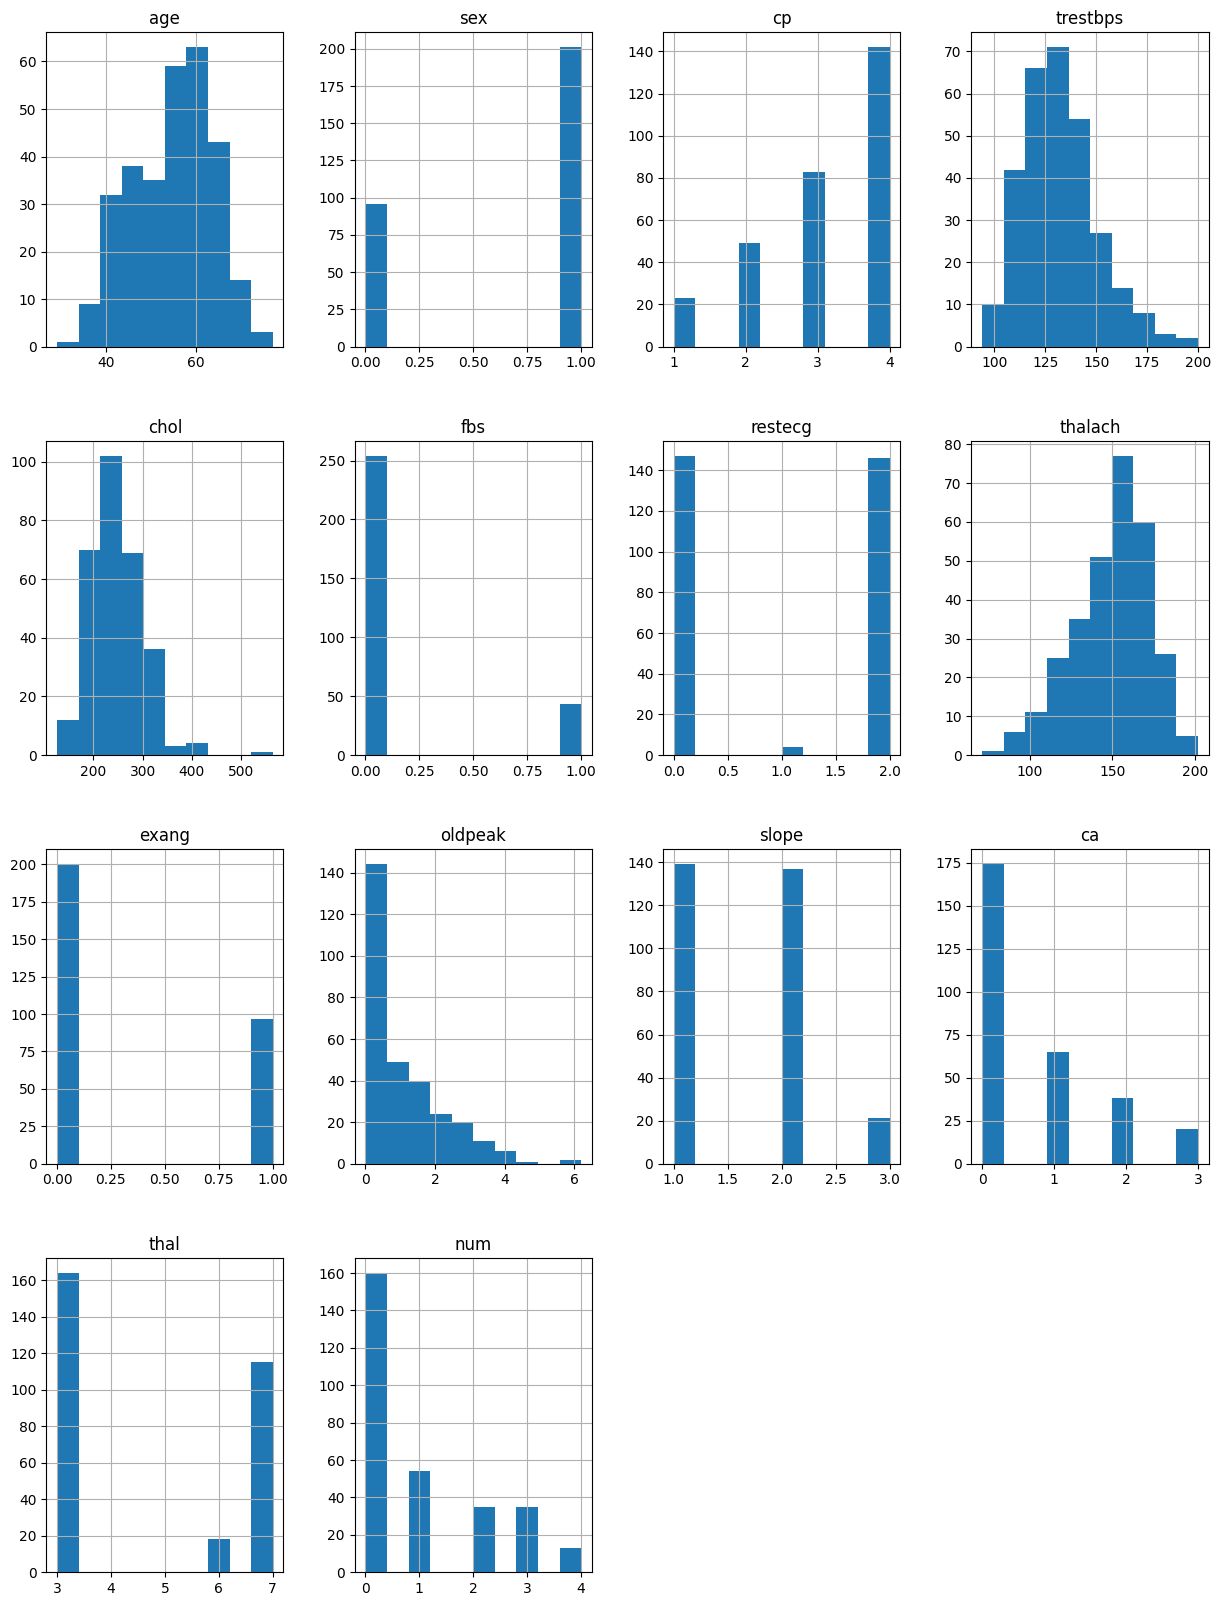

In [10]:
# univariate analysis - plot histogram to see the distribution of the data
fig = plt.figure(figsize = (15, 20))
ax = fig.gca()
data.hist(ax = ax)
plt.show()

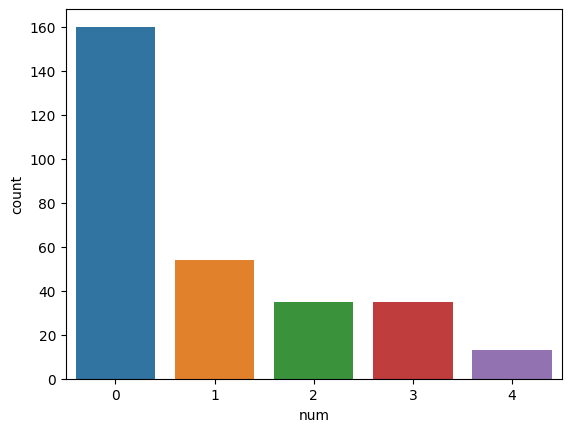

There are: 
160 patients with no heart disease 
54 patients with mild heart disease 
35 patients with moderate heart disease 
35 patients with severe heart disease 
13 patients with very severe heart disease


In [11]:
# target variable analysis
sns.countplot(x = 'num', data = data)
plt.show()
cases = data.num.value_counts().sort_index()
print(f"There are: \n{cases[0]} patients with no heart disease \n{cases[1]} patients with mild heart disease \n{cases[2]} patients with moderate heart disease \n{cases[3]} patients with severe heart disease \n{cases[4]} patients with very severe heart disease")

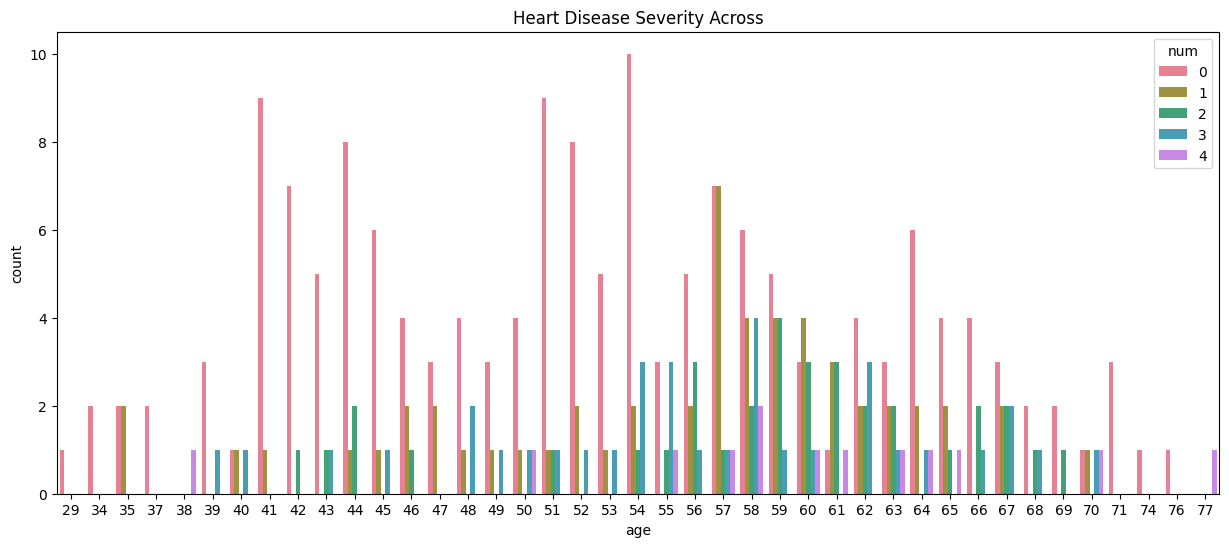

In [12]:
# bivariate analysis - count plot of the 'age' feature, grouped (color-coded) by the 'num' class values

plt.figure(figsize=(15,6))
plt.title('Heart Disease Severity Across')
sns.countplot(x='age',data = data, hue = 'num',palette='husl')
plt.show()


#### Correlation Analysis

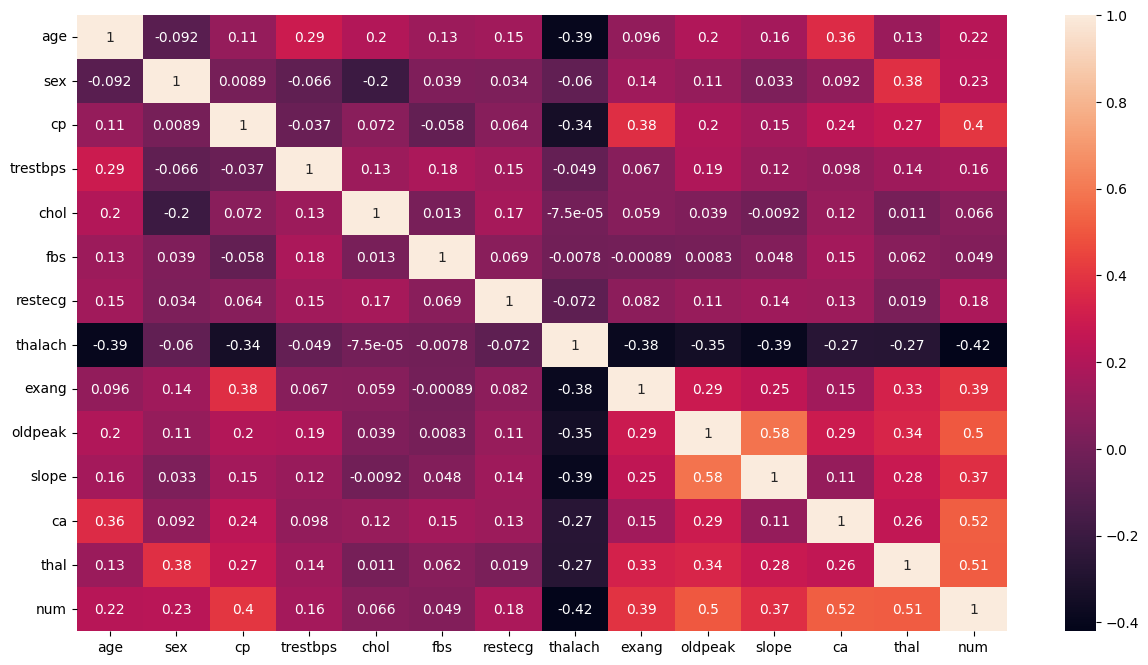

In [13]:
# heatmap of feature correlations

plt.figure(figsize=(15,8))
sns.heatmap(data.corr(), annot = True)
plt.show()

### Feature Selection

In [14]:
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy

In [15]:
# define the feature (x = feature y = target)
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [16]:
forest = RandomForestClassifier(
            n_estimators = 1000, 
            n_jobs = -1, 
            class_weight = 'balanced'
         )

In [17]:
# define Boruta feature selection method
feat_selector = BorutaPy(
                    forest,
                    n_estimators = 'auto',
                    verbose = 2)

In [18]:
# find all relevant features
feat_selector.fit(x,y)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	0
Tentative: 	5
Rejected: 	8
Iteration: 	9 / 100
Confirmed: 	0
Tentative: 	5
Rejected: 	8
Iteration: 	10 / 100
Confirmed: 	0
Tentative: 	5
Rejected: 	8
Iteration: 	11 / 100
Confirmed: 	0
Tentative: 	5
Rejected: 	8
Iteration: 	12 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	8
Iteration: 	13 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	8
Iteration: 	14 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	8
Iteration: 	15 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	8
Iteration: 	16 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	8
Iteration:

BorutaPy(estimator=RandomForestClassifier(class_weight='balanced',
                                          n_estimators=24, n_jobs=-1,
                                          random_state=RandomState(MT19937) at 0x2347F21E040),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x2347F21E040, verbose=2)

In [19]:
# Most Important Features Selected 
most_important = data.columns[:-1][feat_selector.support_].tolist()
most_important

['thalach', 'oldpeak']

In [20]:
# select the top 7 features - broader set with best ranks (for possiblily beeter accuracy)
top_features = data.columns[:-1][feat_selector.ranking_ <= 6].tolist()
top_features

['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca', 'thal']

In [21]:
import statsmodels.api as sm

In [22]:
x_top = data[top_features]
y = (data['num'] > 0).astype(int)

In [23]:
res = sm.Logit(y, x_top).fit()
print(res.summary())

Optimization terminated successfully.
         Current function value: 0.399108
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                    num   No. Observations:                  297
Model:                          Logit   Df Residuals:                      290
Method:                           MLE   Df Model:                            6
Date:                Thu, 18 Sep 2025   Pseudo R-squ.:                  0.4217
Time:                        23:23:53   Log-Likelihood:                -118.54
converged:                       True   LL-Null:                       -204.97
Covariance Type:            nonrobust   LLR p-value:                 1.104e-34
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age           -0.0285      0.018     -1.579      0.114      -0.064       0.007
trestbps       0.0143      0.

In [24]:
params = res.params
conf = res.conf_int()
conf['Odds Ratio'] = params
conf.columns = ['5%', '95%', 'Odds Ratio']
print(np.exp(conf))

                5%       95%  Odds Ratio
age       0.938095  1.006900    0.971889
trestbps  0.996206  1.032981    1.014427
chol      0.997190  1.009527    1.003340
thalach   0.955188  0.980133    0.967580
oldpeak   1.157941  2.235404    1.608871
ca        2.088567  5.102564    3.264513
thal      1.408184  1.956698    1.659937


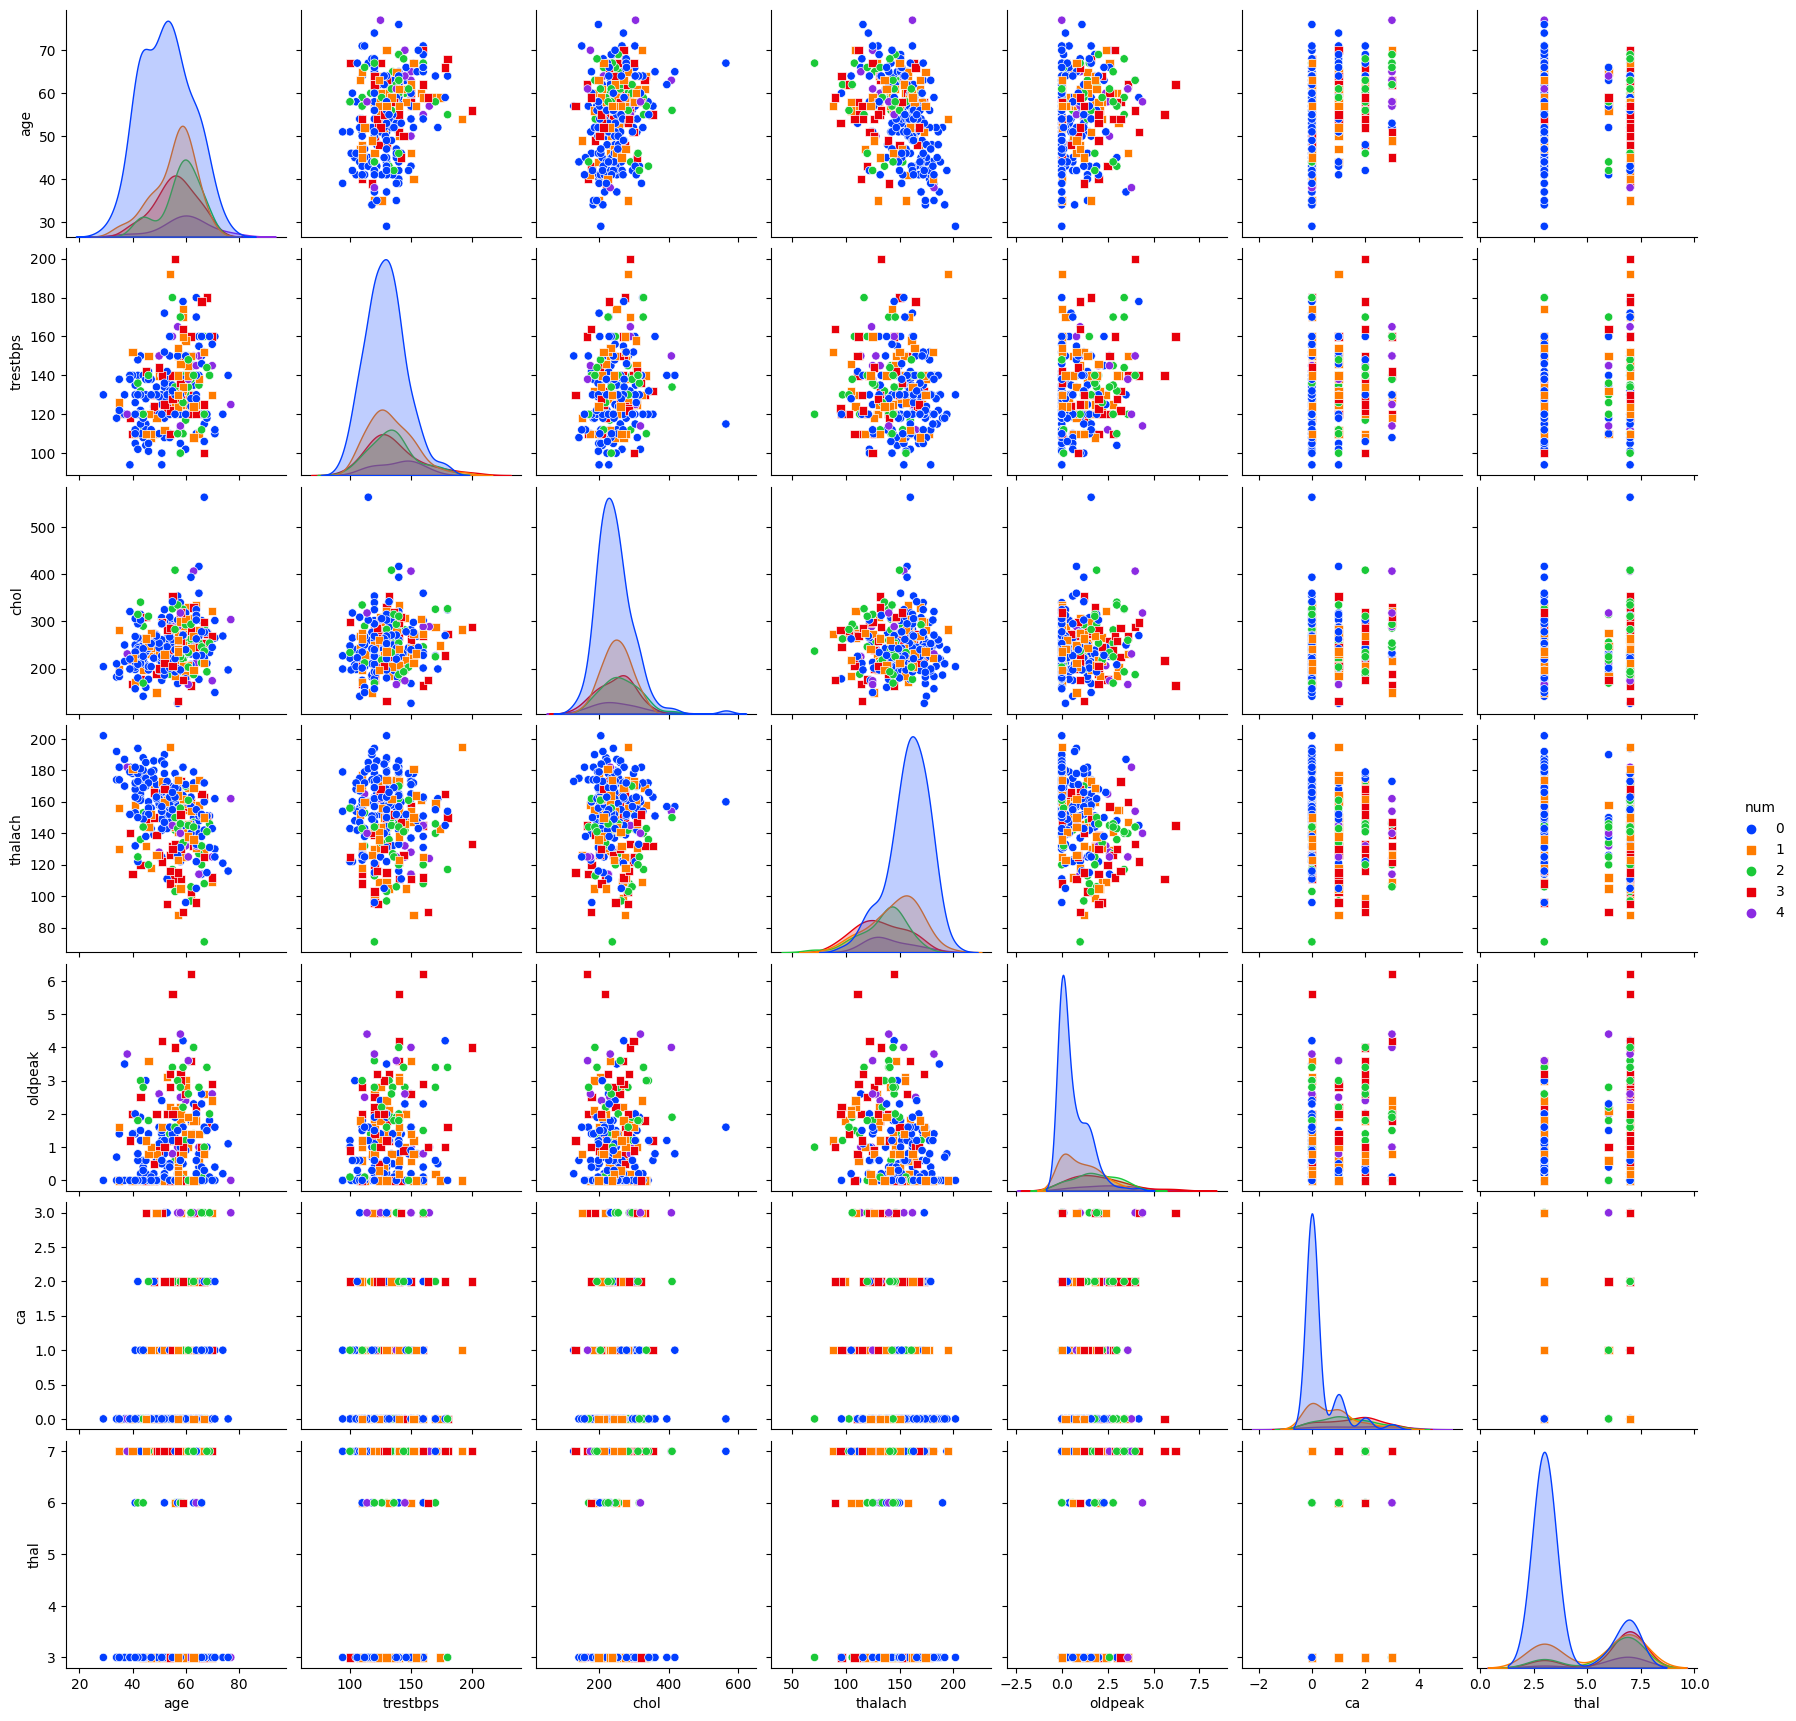

In [25]:
sns.pairplot(data, 
             hue = 'num', 
             markers=["o", "s"], 
             vars = top_features, 
             palette = sns.color_palette("bright", 10)
            )

## Key Observations from the above pairplot

#### 1. ca (Number of major vessels seen on fluoroscopy)

Values: 0,1,2,3 (discrete)

Clear pattern:

    Patients with 0 vessels tend to be more in disease categories (red/orange).

    Patients with 2+ vessels are often in no-disease class (blue, num=0).

    This matches your logistic regression result where ca had a high odds ratio (~3.26).

#### 2. oldpeak (ST depression induced by exercise)

Numeric, typically from 0 to 6

We can see:

    Higher oldpeak values (2+) are more often colored red/orange (more severe disease).

    Lower values (0–1) are mostly blue/green (less/no disease).

    Matches odds ratio (~1.6): each unit increase increases risk.

#### 3. thalach (Maximum heart rate achieved)

Numeric, 70–200 range

Pattern:

    Higher thalach (~160–200): mostly blue points (no disease).

    Lower thalach (~100–130): more red/orange (disease).

    Negative coefficient: higher heart rate → less chance of disease.

#### 4. thal (Thalassemia status: 3=normal, 6=fixed defect, 7=reversible defect)

Discrete: 3,6,7

Visual:

    Thal = 6 or 7 → more disease (red/orange)

    Thal = 3 → mostly blue (no disease)

    Very strong predictor too.

#### 5. age, trestbps (resting BP), chol (cholesterol)

These are more widely scattered and overlap between all classes.

That’s why they have low z-scores and p-values > 0.05 — not statistically strong individually.

## 5. Smote

In [26]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter
import pandas as pd

In [27]:
X = data[top_features]
y = data.iloc[:, -1]

In [28]:
# Class distribution before
num_before = dict(Counter(y))
print(f'Class distribution before SMOTE: {num_before}')

# SMOTE + UnderSampling strategy
sampling_strategy = {0: 500, 1: 500, 2: 500}  # Add more if needed

over = SMOTE(sampling_strategy=sampling_strategy, random_state=42)
under = RandomUnderSampler(sampling_strategy=sampling_strategy, random_state=42)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

# Apply SMOTE + undersampling
X_smote, y_smote = pipeline.fit_resample(X, y)


Class distribution before SMOTE: {0: 160, 2: 35, 1: 54, 3: 35, 4: 13}


In [29]:
# Class distribution after
num_after = dict(Counter(y_smote))
print(f'Class distribution after SMOTE: {num_after}')

Class distribution after SMOTE: {0: 500, 1: 500, 2: 500, 3: 35, 4: 13}


###### 5.1 Splitting data into Training and Testing set

In [30]:
# Build new dataset
new_data = pd.concat([pd.DataFrame(X_smote), pd.DataFrame(y_smote)], axis=1)

In [31]:
# Automatically get correct column names
new_columns = list(X.columns) + ['num']
new_data.columns = new_columns
new_data.head()

,age,trestbps,chol,thalach,oldpeak,ca,thal,num
498,63,148,231,147,2.300000,0,6,0
133,43,122,213,165,0.200000,0,3,0
511,61,135,251,170,0.226127,0,3,0
279,35,122,192,174,0.000000,0,3,0
193,69,160,234,131,0.100000,1,3,0


In [32]:
x1 = new_data[top_features]
y1= new_data.iloc[:,-1]
x1.head()

,age,trestbps,chol,thalach,oldpeak,ca,thal
498,63,148,231,147,2.300000,0,6
133,43,122,213,165,0.200000,0,3
511,61,135,251,170,0.226127,0,3
279,35,122,192,174,0.000000,0,3
193,69,160,234,131,0.100000,1,3


In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x1, y1,test_size=.2,
                                                 random_state=42)

## 6. Prediction Model

6.1 Naive Bayes

In [34]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [35]:
y_pred = model.predict(X_test)

In [36]:
from sklearn.metrics import accuracy_score, mean_squared_error, matthews_corrcoef, classification_report

# Calculate accuracy
nb_accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {nb_accuracy:.2f}')

# Calculate Mean Squared Error (MSE)
nb_mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {nb_mse:.2f}')

# Calculate Root Mean Squared Error (RMSE)
nb_rmse = np.sqrt(nb_mse)
print(f'RMSE: {nb_rmse:.2f}')

# Calculate Matthews Correlation Coefficient (MCC)
nb_mcc = matthews_corrcoef(y_test, y_pred)
print(f'Matthews Correlation Coefficient (MCC): {nb_mcc:.2f}')

# Additionally, you can print the classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.63
MSE: 0.52
RMSE: 0.72
Matthews Correlation Coefficient (MCC): 0.46
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.80      0.74       101
           1       0.53      0.45      0.48       103
           2       0.67      0.71      0.69        93
           3       0.33      0.22      0.27         9
           4       0.00      0.00      0.00         4

    accuracy                           0.63       310
   macro avg       0.44      0.44      0.44       310
weighted avg       0.61      0.63      0.62       310



6.2 Random Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier  
from sklearn.ensemble import RandomForestRegressor  

In [38]:
x2 = new_data[top_features]
y2= new_data.iloc[:,-1]
x2.head()

,age,trestbps,chol,thalach,oldpeak,ca,thal
498,63,148,231,147,2.300000,0,6
133,43,122,213,165,0.200000,0,3
511,61,135,251,170,0.226127,0,3
279,35,122,192,174,0.000000,0,3
193,69,160,234,131,0.100000,1,3


In [39]:
X_train, X_test, y_train, y_test = train_test_split(x2, y2, test_size=0.2, 
                                                    random_state=42)

In [40]:
model = RandomForestClassifier(n_estimators=100, random_state=42)  # Adjust parameters as needed
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [41]:
y_pred = model.predict(X_test)

In [42]:
rfc_accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {rfc_accuracy}')

# Calculate Mean Squared Error (MSE)
rfc_mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {rfc_mse:.2f}')

# Calculate Root Mean Squared Error (RMSE)
rfc_rmse = np.sqrt(rfc_mse)
print(f'RMSE: {rfc_rmse:.2f}')

# Calculate Matthews Correlation Coefficient (MCC)
rfc_mcc = matthews_corrcoef(y_test, y_pred)
print(f'Matthews Correlation Coefficient (MCC): {rfc_mcc:.2f}')

# Additionally, you can print the classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.9161290322580645
MSE: 0.19
RMSE: 0.44
Matthews Correlation Coefficient (MCC): 0.88
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       101
           1       0.88      0.94      0.91       103
           2       0.94      0.97      0.95        93
           3       0.00      0.00      0.00         9
           4       0.00      0.00      0.00         4

    accuracy                           0.92       310
   macro avg       0.55      0.57      0.56       310
weighted avg       0.88      0.92      0.90       310



6.3 Artificial Neural Network

In [43]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [44]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x1)

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y1, test_size=0.2,
                                                    random_state=42)

In [46]:
# Define the model
model = Sequential()
model.add(Dense(units=64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))  # For binary classification

In [47]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [48]:
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.3893 - loss: 0.5179 - val_accuracy: 0.4435 - val_loss: -0.2169
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4749 - loss: -0.4363 - val_accuracy: 0.4556 - val_loss: -1.4093
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4790 - loss: -1.6852 - val_accuracy: 0.4476 - val_loss: -3.5744
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5058 - loss: -3.7320 - val_accuracy: 0.4435 - val_loss: -7.9097
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4800 - loss: -9.1601 - val_accuracy: 0.4395 - val_loss: -16.4557
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4737 - loss: -20.6610 - val_accuracy: 0.4355 - val_loss: -30.5430
Epoch 7/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4720 - loss: -37.1778 - val_accuracy: 0.4435 - val_loss: -52.8542
Epoch 8/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.4886 - loss: -54.3845 - val_a

In [49]:
# Evaluate the model
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)  # Threshold for binary classification

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


In [50]:
# Accuracy
ann_accuracy = accuracy_score(y_test, y_pred_binary)
print('Accuracy:', ann_accuracy)

# Calculate Mean Squared Error (MSE)
ann_mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {ann_mse:.2f}')

# Calculate Root Mean Squared Error (RMSE)
ann_rmse = np.sqrt(ann_mse)
print(f'RMSE: {ann_rmse:.2f}')

# Ensure y_test and y_pred are categorical (e.g., integers or labels for classes)
if y_test.dtype in ['float64', 'float32']:
    y_test = y_test.astype(int)
if y_pred.dtype in ['float64', 'float32']:
    y_pred = y_pred.astype(int)

# Calculate Matthews Correlation Coefficient (MCC)
ann_mcc = matthews_corrcoef(y_test, y_pred)
print(f'Matthews Correlation Coefficient (MCC): {ann_mcc:.2f}')

# Additionally, you can print the classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.47419354838709676
MSE: 0.72
RMSE: 0.85
Matthews Correlation Coefficient (MCC): 0.25
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.76      0.72       101
           1       0.36      0.68      0.47       103
           2       0.00      0.00      0.00        93
           3       0.00      0.00      0.00         9
           4       0.00      0.00      0.00         4

    accuracy                           0.47       310
   macro avg       0.21      0.29      0.24       310
weighted avg       0.34      0.47      0.39       310



6.4 Support Vector Machine

In [51]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [52]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [53]:
# Create and train the SVM model
model = SVC(kernel='linear')  # You can choose different kernels like 'rbf'
model.fit(X_train_scaled, y_train)

SVC(kernel='linear')

In [54]:
y_pred = model.predict(X_test_scaled)

In [55]:
# accuracy
svm_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", svm_accuracy)

# Calculate Mean Squared Error (MSE)
svm_mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {svm_mse:.2f}')

# Calculate Root Mean Squared Error (RMSE)
svm_rmse = np.sqrt(svm_mse)
print(f'RMSE: {svm_rmse:.2f}')

# Calculate Matthews Correlation Coefficient (MCC)
svm_mcc = matthews_corrcoef(y_test, y_pred)
print(f'Matthews Correlation Coefficient (MCC): {svm_mcc:.2f}')

# Additionally, you can print the classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.6548387096774193
MSE: 0.50
RMSE: 0.70
Matthews Correlation Coefficient (MCC): 0.51
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.85      0.76       101
           1       0.61      0.39      0.47       103
           2       0.65      0.83      0.73        93
           3       0.00      0.00      0.00         9
           4       0.00      0.00      0.00         4

    accuracy                           0.65       310
   macro avg       0.39      0.41      0.39       310
weighted avg       0.62      0.65      0.62       310



6.5 K-Nearest Neighbour

In [56]:
from sklearn.neighbors import KNeighborsClassifier

In [57]:
k = 5
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, y_train)

KNeighborsClassifier()

In [58]:
predictions = model.predict(X_test)

In [59]:
# accuracy
knn_accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {knn_accuracy}')

# Calculate Mean Squared Error (MSE)
knn_mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {knn_mse:.2f}')

# Calculate Root Mean Squared Error (RMSE)
knn_rmse = np.sqrt(knn_mse)
print(f'RMSE: {knn_rmse:.2f}')

# Calculate Matthews Correlation Coefficient (MCC)
knn_mcc = matthews_corrcoef(y_test, y_pred)
print(f'Matthews Correlation Coefficient (MCC): {knn_mcc:.2f}')

# Additionally, you can print the classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.8612903225806452
MSE: 0.50
RMSE: 0.70
Matthews Correlation Coefficient (MCC): 0.51
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.85      0.76       101
           1       0.61      0.39      0.47       103
           2       0.65      0.83      0.73        93
           3       0.00      0.00      0.00         9
           4       0.00      0.00      0.00         4

    accuracy                           0.65       310
   macro avg       0.39      0.41      0.39       310
weighted avg       0.62      0.65      0.62       310



## Comparing the Models

In [60]:
comparison = pd.DataFrame({
    "Naive Bayes": {
        'Accuracy': nb_accuracy,
        'MSE': nb_mse,
        'RMSE': nb_rmse,
        'MCC': nb_mcc
    },
    "Artificial Neural Networks": {
        'Accuracy': ann_accuracy,
        'MSE': ann_mse,
        'RMSE': ann_rmse,
        'MCC': ann_mcc
    },
    "Random Forest": {
        'Accuracy': rfc_accuracy,
        'MSE': rfc_mse,
        'RMSE': rfc_rmse,
        'MCC': rfc_mcc
    },
    "Support Vector Machine": {
        'Accuracy': svm_accuracy,
        'MSE': svm_mse,
        'RMSE': svm_rmse,
        'MCC': svm_mcc
    },
    "K-nearest Neighbors": {
        'Accuracy': knn_accuracy,
        'MSE': knn_mse,
        'RMSE': knn_rmse,
        'MCC': knn_mcc
    }
}).T

comparison

,Accuracy,MSE,RMSE,MCC
Naive Bayes,0.629032,0.519355,0.720663,0.461684
Artificial Neural Networks,0.474194,0.715565,0.845911,0.254747
Random Forest,0.916129,0.190323,0.436260,0.877912
Support Vector Machine,0.654839,0.496774,0.704822,0.505149
K-nearest Neighbors,0.861290,0.496774,0.704822,0.505149


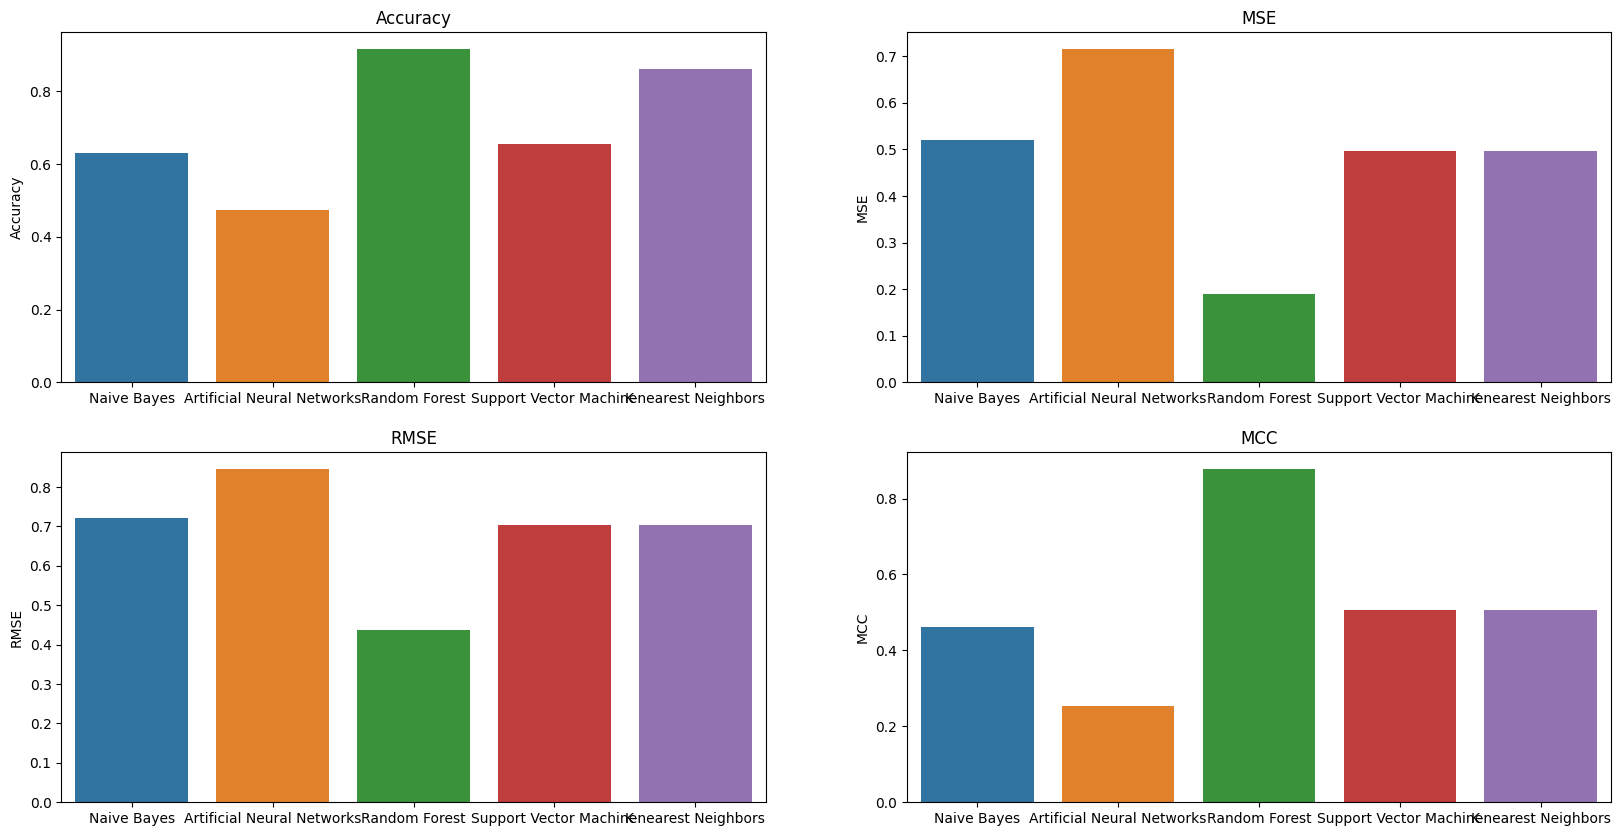

In [61]:
# plotting the comparisons of different models 

fig = plt.gcf()
fig.set_size_inches(20, 10)

titles = ['Accuracy', 'MSE', 'RMSE', 'MCC']

for i, label in enumerate(comparison.columns):
    plt.subplot(2, 2, i+1)  # Adjust subplot indexing
    sns.barplot(x=comparison.index, y=comparison[label], data=comparison)
    plt.xticks(fontsize=10)
    plt.title(titles[i])

plt.show()

In [63]:
import joblib
joblib.dump(model, 'random_forest_model.pkl')

['random_forest_model.pkl']